# Netflix Data

### Goals:

In the current notebook, a project analyzing Netflix data is performed. The goals of the project are the following:
* Get acquainted with the data
* Clean the data and prepare it for analysis
* Set the questions to answers with the analysis.
* Analyze variables within the data to unrevel patterns and insights on these questions

### Data

The data used in the project has been obtained from Kaggle:

[https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download&select=netflix_titles.csv](https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download&select=netflix_titles.csv)

### Load Libraries

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [105]:
netflix_data = pd.read_csv('netflix_titles.csv')

### Preliminar Exploration

In [106]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [107]:
#Duplicates
duplicates = netflix_data.duplicated()
print(duplicates.value_counts())

False    8807
dtype: int64


In [108]:
#Missing data
print(netflix_data.isnull().sum())
print(netflix_data.info())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usag

In [109]:
#Statistical info
print(netflix_data.describe())

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


### Data Insights

* There are 12 columns and 8807 rows.
* Most values are strings in this dataset.
* `director`, `cast` and `country` have many missing values. Other columns like `date_added`, `rating`, and `duration` have some missing values aswell.

### Data Cleaning
The missing values are going to be refilled with 'Unknown'.

In [110]:
netflix_data.director.fillna(value="Unknown",inplace=True)
netflix_data.director

0       Kirsten Johnson
1               Unknown
2       Julien Leclercq
3               Unknown
4               Unknown
             ...       
8802      David Fincher
8803            Unknown
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

In [111]:
netflix_data.cast.fillna(value="Unknown",inplace=True)
netflix_data.cast

0                                                 Unknown
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                 Unknown
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                              Unknown
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [112]:
netflix_data.country.fillna(value="Unknown",inplace=True)
netflix_data.country

0       United States
1        South Africa
2             Unknown
3             Unknown
4               India
            ...      
8802    United States
8803          Unknown
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [113]:
netflix_data.date_added.fillna(value="Unknown",inplace=True)
netflix_data.date_added

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [15]:
netflix_data.rating.fillna(value="Unknown",inplace=True)
netflix_data.rating

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

In [114]:
print(netflix_data.isnull().sum())
print(netflix_data.info())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [116]:
netflix_data.dropna(inplace=True)

In [117]:
print(netflix_data.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


### Exploratory Data Analysis
After some data cleaning and tidying, the DataFrame is ready for EDA. The following  variables will be focused on in the analysis:
* `type`
* `release_year`
* `rating`
* `country`
* `duration`

The hope is that through summary statistics and visualizations the following question can be answered:
* How has been the evolution of Netflix content in the last years?
* How the rating is distributed in Netflix content?
* How is Netflix introducing content created in different countries?
* How long are Netflix Movies and TV Shows?

Along the way, this question may be refined and more questions may pop up.

### `type` Variable 

First, lets check the different types of content present in Netflix Data.

In [118]:
netflix_data.type.value_counts()

Movie      6126
TV Show    2674
Name: type, dtype: int64

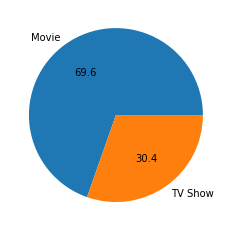

In [119]:
plt.figure()
plt.pie(netflix_data.type.value_counts(), 
       labels = netflix_data.type.value_counts().index,
       autopct = '%.1f')
plt.show()

There is a 69.6% of Movies and a 30.4% of TV Shows. Next, lets focus on the evolution fo the number of Movies and TV Shows present in Netflix during the last 10 years.

In [120]:
netflix_data.release_year.value_counts()

2018    1147
2017    1030
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [121]:
netflix_years = netflix_data[["type","release_year"]]

In [122]:
netflix_years

,type,release_year
0,Movie,2020
1,TV Show,2021
2,TV Show,2021
3,TV Show,2021
4,TV Show,2021
...,...,...
8802,Movie,2007
8803,TV Show,2018
8804,Movie,2009
8805,Movie,2006


In [123]:
netflix_years = netflix_years[netflix_years['release_year'] >= 2012]

In [124]:
netflix_years.release_year.value_counts().sort_index()

2012     237
2013     287
2014     352
2015     557
2016     902
2017    1030
2018    1147
2019    1030
2020     953
2021     592
Name: release_year, dtype: int64

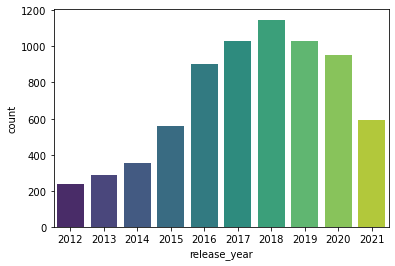

In [125]:
plt.figure()
sns.countplot(x = 'release_year', data = netflix_years, palette = 'viridis')
plt.show()

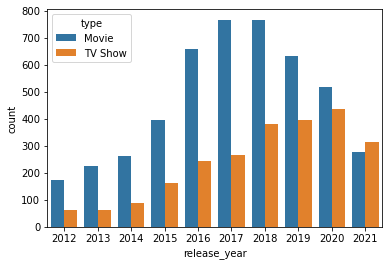

In [126]:
plt.figure()
sns.countplot(x = 'release_year', data = netflix_years, hue = 'type')
plt.show()

From 2012 untill 2018 there was a big increase in the number of both Movies and TV Shows present in Netflix. The number of movies started decreasing in 2019. Nevertheless, the number of TV Shows started to decrease in 2021. Interestingly, 2021 is the first year of the last 10 where the number of new TV Shows is higher than the one of Movies.

### `rating` Variable

After analysis of the evolution of the type of content present in Netflix, the `rating` variable is analyzed. Since the categories used in the dataset are not very easy to understand, they are substituted by self explanatory values.

In [127]:
netflix_data.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [128]:
new_rating = {
    'TV-PG': 'Parental Guidance',
    'TV-MA': 'Mature Audience',
    'TV-Y7-FV': 'Teens',
    'TV-Y7': 'Teens',
    'TV-14': 'Teens',
    'R': 'Mature Audience',
    'TV-Y': 'General Audience',
    'NR': 'Mature Audience',
    'PG-13': 'Teens',
    'TV-G': 'General Audience',
    'PG': 'Teens',
    'G': 'General Audience',
    'UR': 'Mature Audience',
    'NC-17': 'Mature Audience'
}
netflix_data['rating'] = netflix_data['rating'].replace(new_rating)

In [129]:
netflix_data.rating.value_counts()

Mature Audience      4092
Teens                3277
Parental Guidance     863
General Audience      568
Name: rating, dtype: int64

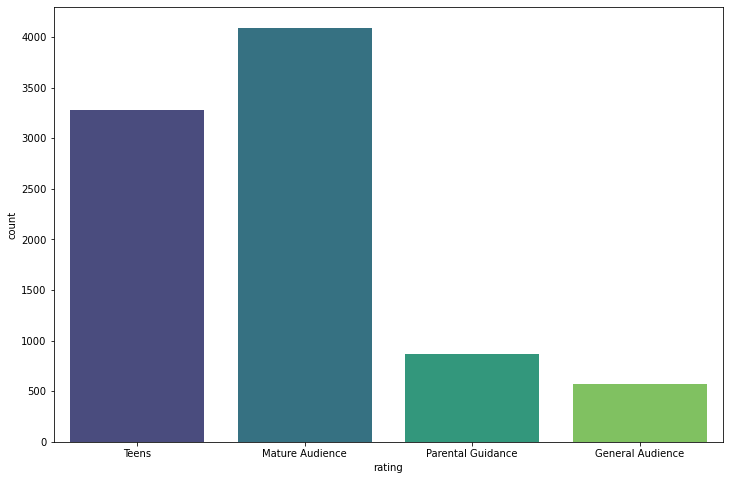

In [130]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'rating', 
              data = netflix_data, 
              order= ['Teens','Mature Audience', 'Parental Guidance', 'General Audience'], 
              palette = 'viridis')
plt.show()

Teens and Mature Audience are the rating categories most present in Netflix. Parental Guidance and General Audience's representation is much lower compared to the two previous categories mentioned.

### `country` Variable

Next, the `country` variable is studied. Since there is 749 countries, only the top 20 countries are taken into account in the present analysis.

In [131]:
netflix_data.country.value_counts()

United States                             2815
India                                      972
Unknown                                    830
United Kingdom                             419
Japan                                      244
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

In [132]:
netflix_data.country.nunique()

749

In [133]:
netflix_countries = netflix_data.country.value_counts().head(20)

In [134]:
netflix_countries

United States                    2815
India                             972
Unknown                           830
United Kingdom                    419
Japan                             244
South Korea                       199
Canada                            181
Spain                             145
France                            124
Mexico                            110
Egypt                             106
Turkey                            105
Nigeria                            95
Australia                          86
Taiwan                             81
Indonesia                          79
Brazil                             77
Philippines                        75
United Kingdom, United States      75
United States, Canada              73
Name: country, dtype: int64

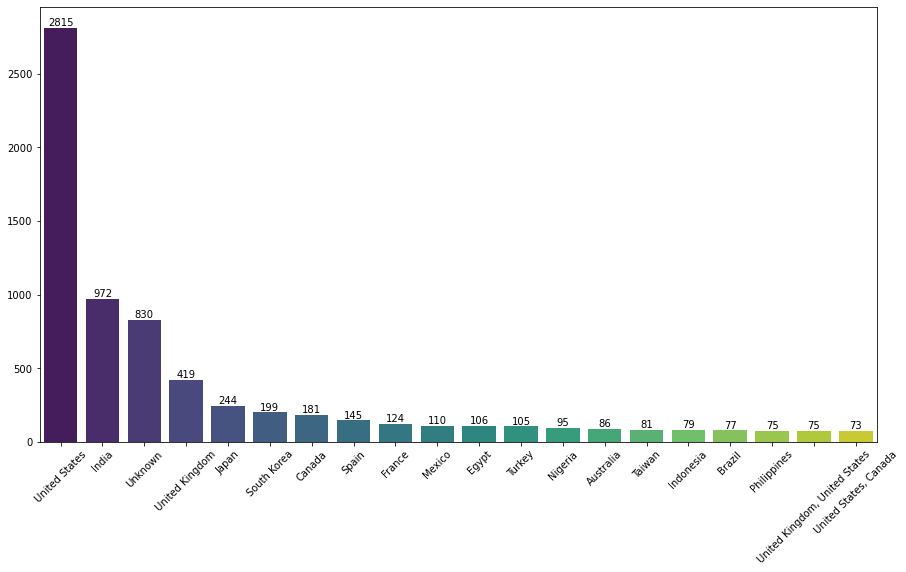

In [135]:
plt.figure(figsize=(15,8))
ax=sns.barplot(x=netflix_data.country.value_counts()[:20].index , 
               y=netflix_data.country.value_counts()[:20].values ,
               palette = 'viridis')
ax.set_xticklabels(netflix_data.country.value_counts()[:20].index,rotation=45)
for i in ax.containers:
    ax.bar_label(i);


The United States has almost three times more productions than the second country, India.

### `duration` Variable

Last, the `duration` variable is tackled. In this study, both 'Movies' and 'TV Shows are considered.

In [140]:
netflix2 = netflix_data.copy()
netflix2.duration = netflix2.duration.apply(lambda x :int(x.split()[0]))

In [144]:
movies = netflix2[netflix2.type == 'Movie']
tv_shows = netflix2[netflix2.type == 'TV Show']

In [145]:
movie_data = movies.sort_values(by = 'duration', ascending = False)[['title', 'duration']].head(10)

In [150]:
movie_data

,title,duration
4253,Black Mirror: Bandersnatch,312
717,Headspace: Unwind Your Mind,273
2491,The School of Mischief,253
2487,No Longer kids,237
2484,Lock Your Girls In,233
2488,Raya and Sakina,230
166,Once Upon a Time in America,229
7932,Sangam,228
1019,Lagaan,224
4573,Jodhaa Akbar,214


In [146]:
tv_shows_data = tv_shows.sort_values(by = 'duration', ascending = False)[['title', 'duration']].head(10)

In [151]:
tv_shows_data

,title,duration
548,Grey's Anatomy,17
2423,Supernatural,15
4798,NCIS,15
1354,Heartland,13
4220,COMEDIANS of the world,13
7847,Red vs. Blue,13
4964,Trailer Park Boys,12
5412,Criminal Minds,12
6795,Frasier,11
6456,Cheers,11


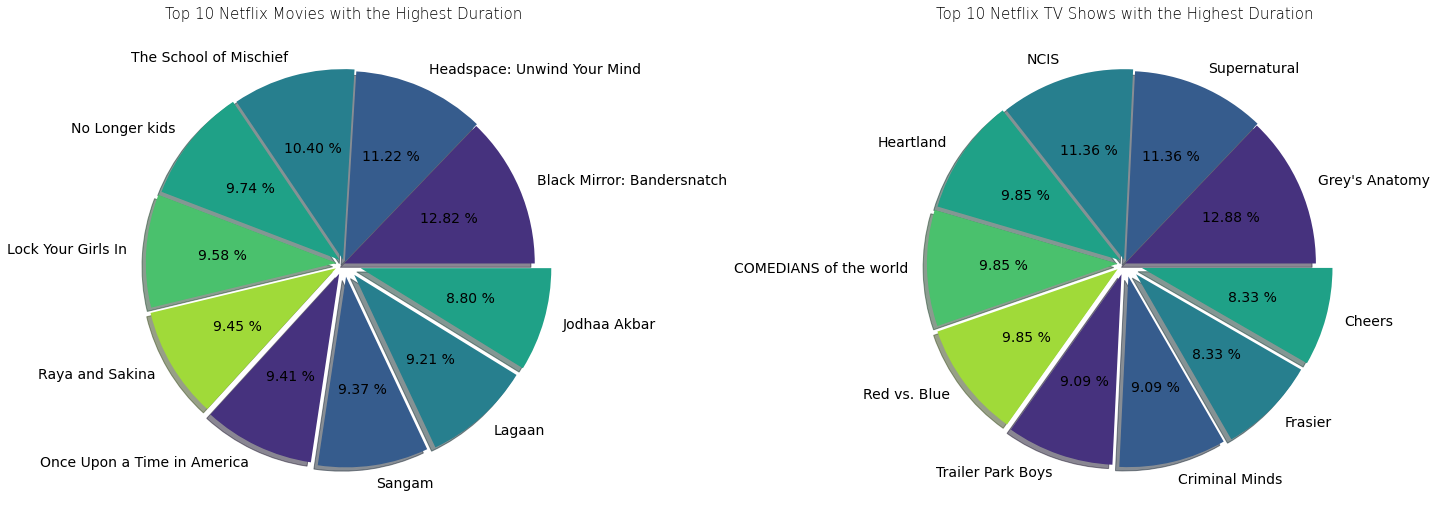

In [148]:
fig, ax = plt.subplots(1,2, figsize=(20, 10), tight_layout=True)
colors = sns.color_palette('viridis')

explode_list1 = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
ax[0].pie(movie_data.duration,labels= movie_data.title, autopct='%1.2f %%', explode=explode_list1, colors=colors, shadow=True,textprops={'fontsize': 14})
ax[0].set_title('Top 10 Netflix Movies with the Highest Duration', weight='light',fontsize=15)

explode_list1 = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
ax[1].pie(tv_shows_data.duration,labels= tv_shows_data.title, autopct='%1.2f %%', explode=explode_list1, colors=colors, shadow=True,textprops={'fontsize': 14})
ax[1].set_title('Top 10 Netflix TV Shows with the Highest Duration', weight='light',fontsize=15)
plt.show()

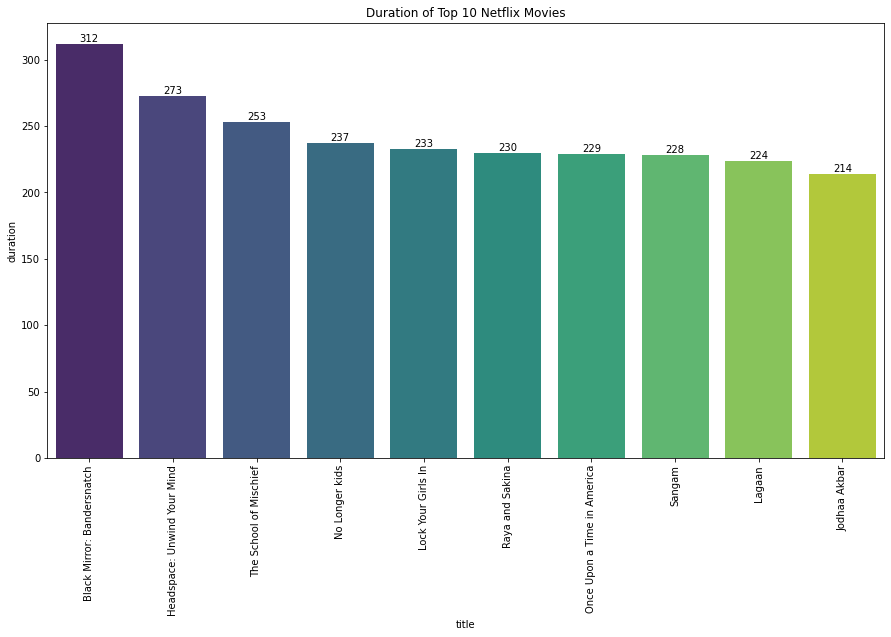

In [149]:
plt.figure(figsize=(15, 8))
ax=sns.barplot(x=movie_data.title,y=movie_data.duration,palette="viridis")
ax.set_xticklabels(movie_data.title,rotation=90)

for i in ax.containers:
    ax.bar_label(i)
plt.title("Duration of Top 10 Netflix Movies");

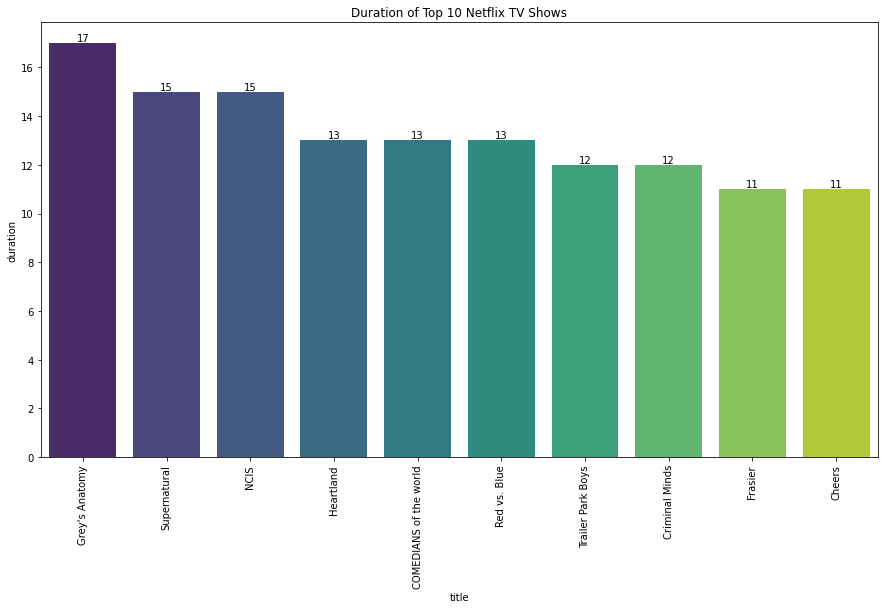

In [153]:
plt.figure(figsize=(15, 8))
ax=sns.barplot(x=tv_shows_data.title,y=tv_shows_data.duration,palette="viridis")
ax.set_xticklabels(tv_shows_data.title,rotation=90)

for i in ax.containers:
    ax.bar_label(i)
plt.title("Duration of Top 10 Netflix TV Shows");

Black Mirror is the longest movie in Netflix (312 min), while Grey's Anatomy is the longest TV Show with 17 seasons.

### Conclusion 
#### Findings Overview

In the present analysis regarding Netflix data, we have answered the inital questions prior to the study:

* From 2012 untill 2018 there was a big increase in the number of both Movies and TV Shows present in Netflix. The number of movies started decreasing in 2019. Nevertheless, the number of TV Shows started to decrease in 2021. Interestingly, 2021 is the first year of the last 10 where the number of new TV Shows is higher than the one of Movies.
* Teens and Mature Audience are the rating categories most present in Netflix. Parental Guidance and General Audience's representation is much lower compared to the two previous categories mentioned.
* The United States has almost three times more productions than the second country, India. There are many countries contributing to both Movies and TV Shows in Netflix, although the number of those is significantly lower than the content with USA origin.
* TOP 10 duration movies range from 214 to 312 min. Regarding TV Shows, all TOP 10 shows are above 10 seasons, with Grey's Anatomy on the TOP with 17 seasons.